# Polynominterpolation

Bei der Interpolation wird eine Modellfunktion gesucht, welche die Messdaten exakt abbildet.

In [2]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})


## Übersicht

In vielen praktischen Anwendungen werden Polynome als Basisfunktionen der Modellfunktion angenommen. Vorteile von Polynomen:
* Polynome sind leicht zu differenzieren und integrieren
* Annäherung von beliebigen Funktionen durch Polynome möglich, siehe [Taylor-Entwicklung](https://de.wikipedia.org/wiki/Taylorreihe)
* Auswertung ist sehr einfach und dadurch schnell, d.h. sie benötigt nur wenige schnelle arithmetische Operationen (Addition und Multiplikation)

Ein Beispiel für eine Basis aus Polynomen:

$$\sf \phi_1(x)=1,\quad \phi_2(x)=x,\quad \phi_3(x)=x^2,\quad \cdots,\quad \phi_m =x^{m-1} $$


## Polynome

Polynome $\sf P(x)$ sind Funktionen in Form einer Summe von Potenzfunktionen mit natürlichzahligen Exponenten ($\sf x^i, i \in \mathbb{N}$) mit den entsprechenden Koeffzienten $\sf a_i$:

$$\sf P(x) = \sum_{i=0}^n a_i x^i = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_2 x^2 + a_1 x + a_0, \quad i, n \in \mathbb{N}, a_i \in \mathbb{R} $$ 

* Als Grad eines Polynoms wird der Term mit dem höchsten Exponenten und nichtverschwindenden Koeffizienten (der sogenannte Leitkoeffizient) bezeichnet.
* Ein Polynom mit Grad $\sf n$ hat $\sf n$, teilweise [komplexe](https://de.wikipedia.org/wiki/Komplexe_Zahl), Nullstellen.

In Python, d.h. im numpy-Modul, werden Polynome durch ihre Koeffizienten representiert. Im Allgemeinen wird ein Polynom mit dem Grad $\sf n$ durch folgendes Array dargestellt

```python
[an, ..., a2, a1, a0]
```

So z.B. für $\sf P(x) = x^3 + 5x^2 - 2x + 3$:

In [2]:
P = np.array([1, 5, -2, 3])
print(P)

[ 1  5 -2  3]


Die Auswertung des Polynoms an einem Punkt oder einem Array erfolgt mit der `np.polyval`-Funktion.

In [3]:
x = 1
y = np.polyval(P, x)
print(f"P(x={x}) = {y}")

P(x=1) = 7


In [4]:
x = np.array([-1, 0, 1])
y = np.polyval(P, x)
print(f"P(x={x}) = {y}")

P(x=[-1  0  1]) = [9 3 7]


Für die graphische Darstellung im Bereich $\sf x \in [-6, 2]$ können die bekannten numpy und matplotlib Funktionen verwendet werden.

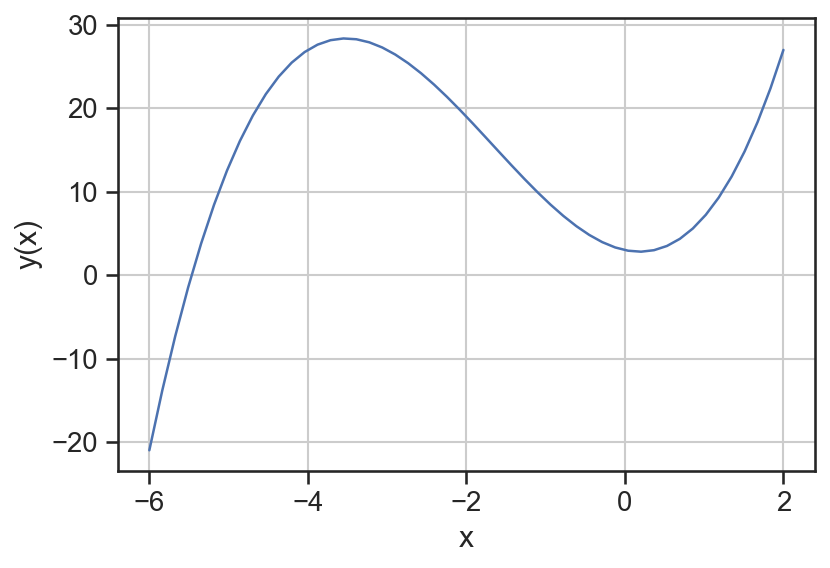

In [5]:
x = np.linspace(-6, 2, 50)
y = np.polyval(P, x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid();

Um die Nullstellen eines Polynoms zu finden, kann die numpy-Funktion `np.roots` genutzt werden. Für das obige Polynom können folgende Nullstellen bestimmt werden. 

In [6]:
nstellen = np.roots(P)

# direkte Ausgabe des Arrays
print("Nullstellen: ")
print(nstellen)

Nullstellen: 
[-5.47+0.j   0.23+0.7j  0.23-0.7j]


In [7]:
print("Nullstellen: ")
# schönere Ausgabe des Arrays
for i, z in enumerate(nstellen):
    if z.imag == 0:
        print(f"  x_{i+1} = {z.real:.2}")
    else:
        print(f"  x_{i+1} = {z.real:.2} {z.imag:+.2}i")

Nullstellen: 
  x_1 = -5.5
  x_2 = 0.23 +0.7i
  x_3 = 0.23 -0.7i


In diesem Beispiel sind zwei der Nullstellen komplex. Eine komplexe Zahl $\sf z$ wird in Python als Summe des Realteils ($\sf Re$) und Imaginärteils ($\sf Im$). Letzterer wird durch ein nachfolgendes `j`, die imaginäre Einheit, gekennzeichnet.

$$\sf z = Re(z) + Im(z)j$$

Die Nullstellen können auch zur alternativen Darstellung des Polynoms verwendet werden. Sind $\sf x_i$ die $\sf n$ Nullstellen, so ist das Polynom $\sf n$-ten Grades durch folgendes Produkt beschrieben:

$$\sf P(x) = \prod_{i=1}^n \left(x - x_i\right) = (x - x_1)\cdot (x - x_2) \cdot \cdots \cdot (x - x_n) $$ 

Seien beispielsweise 1 und 2 die Nullstellen eines Polynoms, so lautet dieses:

$$ \sf P(x) = (x - 1)(x - 2) = x^2 - 3x +2 $$

Die numpy-Funktion `np.poly` kann aus den Nullstellen die Polynomkoeffizienten bestimmen. Anhand des obigen Beispiels lautet der Funktionsaufruf: 

In [8]:
nstellen = [1, 2]
koeffizienten = np.poly(nstellen)

print("Nullstellen:", nstellen)
print("Koeffizienten:", koeffizienten)

Nullstellen: [1, 2]
Koeffizienten: [ 1. -3.  2.]


Das Modul numpy stellt viele praktische Funktionen zum Umgang mit Polynomen zur Verfügung. So existieren Funktionen um Polynome auszuwerten, die Nullstellen zu finden, zu addieren, zu multiplizieren, abzuleiten oder zu integrieren. Eine Übersicht ist in der [numpy-Dokumentation](https://numpy.org/doc/stable/reference/routines.polynomials.poly1d.html) gegeben.

## Interpolation

Interpolation ist eine Methode, um Datenpunkte zwischen gegebenen Messpunkten zu konstruieren. Dazu wird eine Funktion gesucht, die alle Messpunkte exakt abbildet, was gleichbedeutend damit ist, dass die L2-Norm zwischen Funktion und Punkten Null ist.

Zwei Punkte können z.B. mit einer Geraden interpoliert werden. D.h. für zwei Messpunktpaare $\sf(x_1, y_1)$ und $\sf(x_2, y_2)$ mit $\sf x_1\neq x_2$ existiert ein Koeffizientensatz, sodass die L2-Norm zwischen den Messpunkten und der Modellfunktion

$$y(x) = \beta_1 x + \beta_0$$

verschwindet.

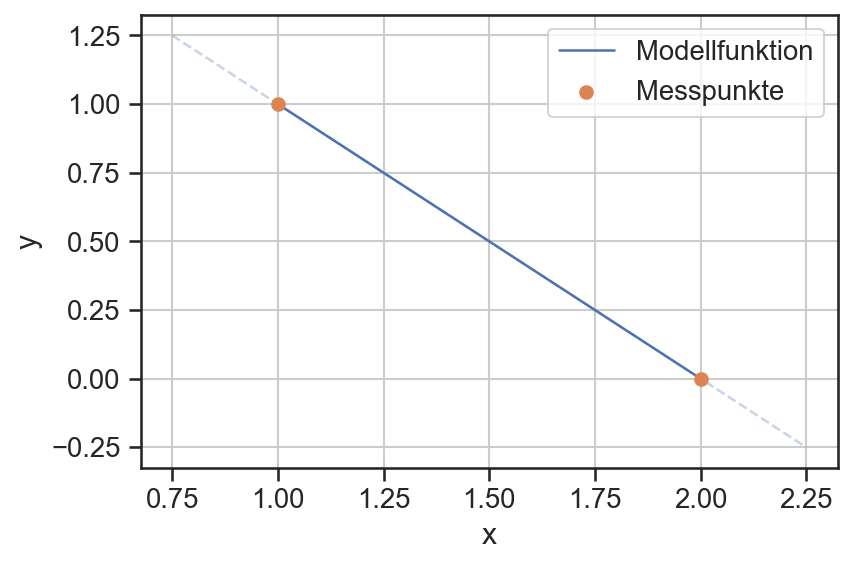

In [9]:
# Beispieldaten aus y(x) = -x + 2

N = 50
dx = 0.25

def fnk(x):
    return -x + 2

x = np.array([1, 2])
y = fnk(x)

plt.scatter(x, y, color='C1', label="Messpunkte", zorder=3)

x_modell = np.linspace(np.min(x), np.max(x), N)
plt.plot(x_modell, fnk(x_modell), color='C0', label="Modellfunktion")

x_linie = np.linspace(np.min(x)-dx, np.max(x)+dx, N)
plt.plot(x_linie, fnk(x_linie), '--', alpha=0.3, color='C0')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid();

Für drei Messpunkte muss ein Polynom zweiten Grades verwendet werden, um die Punkte exakt zu erfassen.

$$y(x) = \beta_2 x^2 + \beta_1 x + \beta_0$$

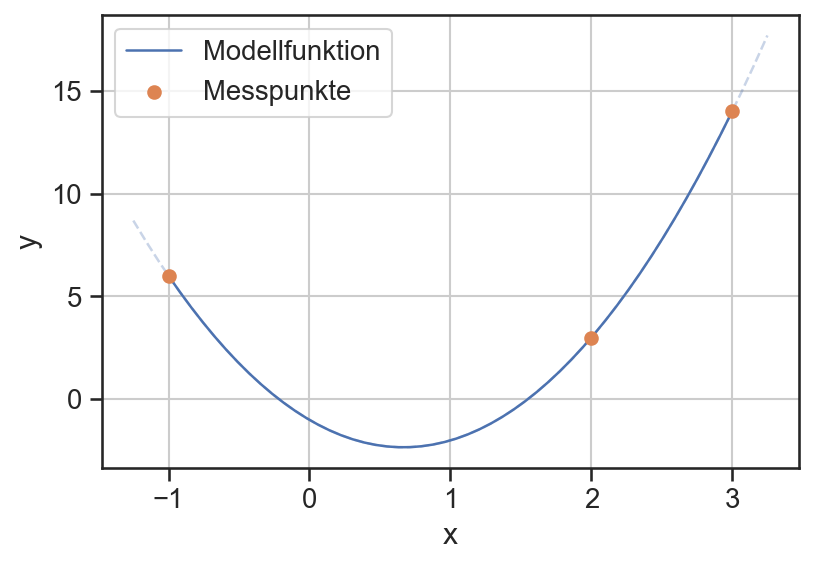

In [10]:
# Beispieldaten aus y(x) = 3x^2 -4x - 1

N = 50
dx = 0.25

def fnk(x):
    return 3*x**2-4*x - 1

x = np.array([-1, 2, 3])
y = fnk(x)

plt.scatter(x, y, color='C1', label="Messpunkte", zorder=3)

x_modell = np.linspace(np.min(x), np.max(x), N)
plt.plot(x_modell, fnk(x_modell), color='C0', label="Modellfunktion")

x_linie = np.linspace(np.min(x)-dx, np.max(x)+dx, N)
plt.plot(x_linie, fnk(x_linie), '--', alpha=0.3, color='C0')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid();

Dies kann verallgemeinert werden: $\sf n$ Messpunkte können exakt mit einem Polynom ($\sf n-1$)-ten Grades abgebildet werden. Die Suche nach den passenden Koeffizienten ist das Lagrangesche Interpolationsproblem. Für das gesuchte Polynom $\sf P(x)$ gilt:

$$ \sf P(x_i) = y_i \quad i \in 1, \dots, n $$

Die Existenz und Eindeutigkeit eines solchen Polynoms kann gezeigt werden. Das gesuchte Polynom lautet: 

$$ \sf P(x) = \sum_{i=1}^n y_i I_i(x) $$
$$ \sf \text{mit}\quad I_i(x) = \prod_{j=1, i\neq j}^n \frac{x-x_j}{x_i - x_j} $$

Alternativ kann auch ein Gleichungssystem, welches durch die Polynomialbasis $\sf \phi_i(x)$ gegeben ist, gelöst werden. Für die $\sf n$ Punktepaare gilt jeweils:

$$ \sf y(x_i) = \sum_{i=1}^{m}\beta_i \cdot \phi_i(x_i) = \beta_1\cdot \phi_1(x_i) + \cdots + \beta_m\cdot \phi_m(x_i) = y_i $$

Das allgemeine Geleichungssystem lautet

$$ \sf \left( \begin{matrix} \phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_m(x_1) \\ 
             \phi_1(x_2) & \phi_2(x_2) & \cdots & \phi_m(x_2) \\ 
             \vdots &\vdots & \ddots & \vdots \\ 
             \phi_1(x_n) & \phi_2(x_n) & \cdots & \phi_m(x_n) \\ 
             \end{matrix}\right). 
\left(  \begin{matrix} \beta_1 \\  
      \beta_2 \\   \vdots \\   \beta_m \\ 
      \end{matrix} \right) 
= \left(  \begin{matrix} y_1 \\  y_2 \\   \vdots \\   y_n \\ \end{matrix} \right) $$


und mit der Polynomialbasis

$$ \underbrace{\left( \begin{matrix} 1 & x_1 & \cdots & x_1^{n-1} \\ 1 & x_2 & \cdots & x_2^{n-1} \\ \vdots &\vdots & \ddots & \vdots \\ 1 & x_n & \cdots & x_n^{n-1} \\ \end{matrix}\right)}_{V}. \left(  \begin{matrix} \beta_1 \\  \beta_2 \\   \vdots \\   \beta_m \\ \end{matrix} \right) = \left(  \begin{matrix} y_1 \\  y_2 \\   \vdots \\   y_n \\ \end{matrix} \right)$$


Die Matrix $\sf V$ heisst [Vandermonde-Matrix](https://de.wikipedia.org/wiki/Vandermonde-Matrix) und kann exakt gelöst werden, für $\sf m=n$ und wenn für alle $\sf i, j, i\neq j$ gilt $\sf x_i \neq x_j$. 

In Python kann das Interpolationsproblem mit der [Funktion `np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) gelöst werden. Das folgende Beispiel demonstriert deren Anwendung.

Die Messtellen folgen in dem Beispiel der Funktion $\sf f(x)$, welche nur zur Generierung der Datenpunkte verwendet wird. 

$$\sf f(x) = \frac{1}{2} + \frac{1}{1+x^2}$$

Zunächst werden die Messpunkte generiert.

In [11]:
def fnk(x):
    return 0.5 + 1/(1+x**2)

In [12]:
xmin = -5
xmax =  5
x = np.linspace(xmin, xmax, 100)
y = fnk(x)

In [17]:
n = 5
xi = np.linspace(xmin, xmax, n)
yi = fnk(xi)

Nun folgt die Interpolation für 5 und 15 Messpunkte.

In [14]:
P = np.polyfit(xi, yi, n-1)
print("Interpolationskoeffizienten:")
print(P)

Interpolationskoeffizienten:
[ 5.31e-03  2.49e-18 -1.71e-01  2.03e-16  1.50e+00]


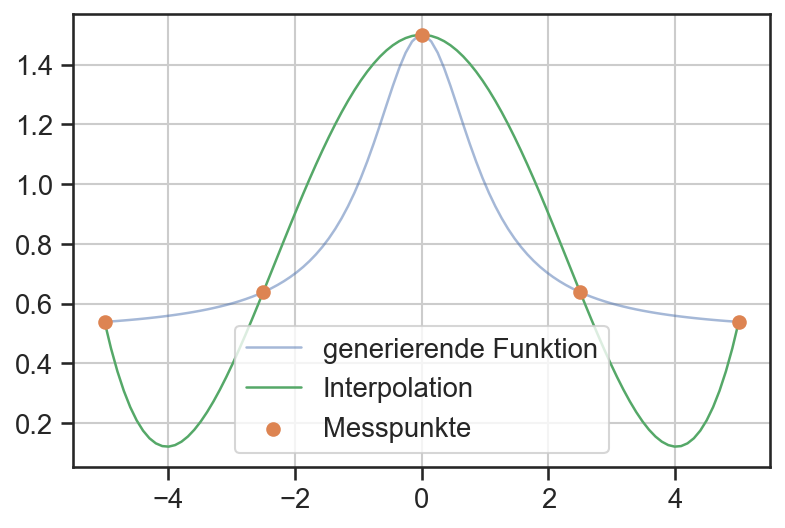

In [15]:
plt.plot(x, y, color='C0', alpha=0.5, label='generierende Funktion')
plt.plot(x, np.polyval(P, x), color='C2', label='Interpolation')
plt.scatter(xi, yi, color='C1', label='Messpunkte', zorder=3)
plt.legend()
plt.grid();

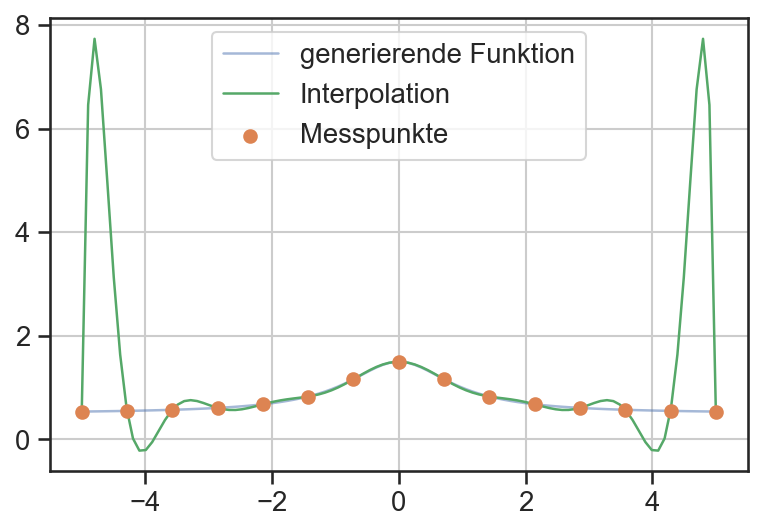

In [16]:
n = 15
xi = np.linspace(xmin, xmax, n)
yi = fnk(xi)

P = np.polyfit(xi, yi, n-1)

plt.plot(x, y, color='C0', alpha=0.5, label='generierende Funktion')
plt.plot(x, np.polyval(P, x), color='C2', label='Interpolation')
plt.scatter(xi, yi, color='C1', label='Messpunkte', zorder=3)
plt.legend()
plt.grid();

Die Interpolation erfüllt immer die geforderte Bedingung $\sf y(x_i) = y_i$. Jedoch führen Polynome mit einem hohen Grad oft zu nicht sinnvollen Ergebnissen. Es entstehen starke Überschwinger, welche mit zunehmendem Grad immer stärker werden. Eine alternative Interpolationsmethode stellen Splines dar, welche mehrere, niedrige Polynome zur Interpolation vieler Punkte verwenden.   